In [2]:
import utils.dataset as dataset
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.animation as animation
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号



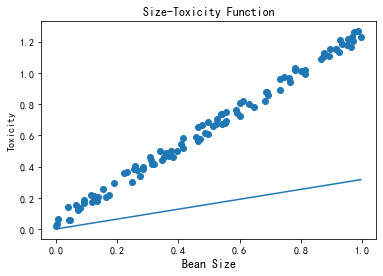

In [3]:
## Create a dataset
n = 100
xs, ys = dataset.get_beans(n)
plt.title('Size-Toxicity Function', fontsize=12)
plt.xlabel('Bean Size')
plt.ylabel('Toxicity')
plt.scatter(xs, ys)

# randomly initialize the weights
w = np.random.randn(1)
y_pre = w*xs
plt.plot(xs,y_pre)
plt.show()


In [14]:
# define the function
def f(x, w):
    return x*w


def MSE(x, y, w):
    return (1/x.shape[0])*np.sum((f(x, w)-y)**2)


def gradient(x, y, w):
    try:
        return (1/x.shape[0])*2*np.sum((f(x, w)-y)*x)
    except:
        return 2*np.sum((f(x, w)-y)*x)


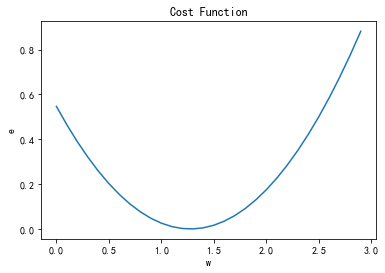

In [5]:
# calculate the MSE
ws = np.arange(0, 3, 0.1)
es = [MSE(xs, ys, wi) for wi in ws]

# visualize the cost function
plt.title('Cost Function', fontsize=12)
plt.xlabel('w')
plt.ylabel('e')
plt.plot(ws, es)
plt.show()


## 随机梯度下降（SGD）

代价函数

$$
e=(y_i-w*x_i)^2=x_i^2w^2-2x_iy_iw+y_i^2
$$

梯度

$$
k=2aw+b=2 \cdot x_i^2 \cdot w-2x_iy_i = 2x_i(wx_i-y_i)
$$


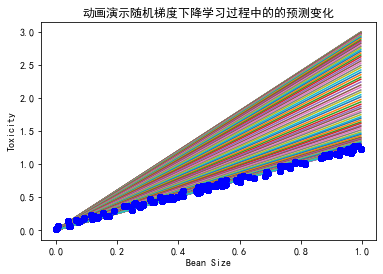

In [37]:
w = 3
alpha=0.1

fig = plt.figure()
ims = []
for i in range(5):
    for i in range(n):
        x = xs[i]
        y = ys[i]
        k =gradient(x, y, w)
        w = w- alpha*k
        y_pre = w*xs
        im = plt.plot(xs, y_pre) + plt.plot(xs, ys, 'o', color="blue")
        plt.title('动画演示随机梯度下降学习过程中的的预测变化')
        plt.xlabel('Bean Size')
        plt.ylabel('Toxicity')
        ims.append(im)


In [25]:
ani = animation.ArtistAnimation(fig, ims, interval=20, repeat_delay=1000)
ani.save("./output/03/随机梯度下降.gif", writer='pillow',dpi=200)


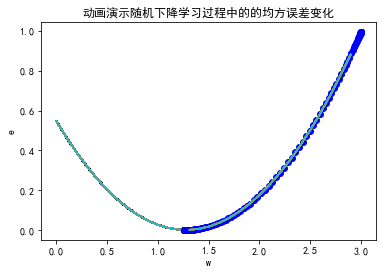

In [57]:

## 动画演示随机梯度下降学习过程中的的均方误差变化

w = 3
alpha = 0.1

fig = plt.figure()
ims = []
for i in range(10):
    for i in range(n):
        x = xs[i]
        y = ys[i]
        k = gradient(x, y, w)
        w = w - alpha*k

        im = plt.plot(ws, es) + plt.plot(w, MSE(xs, ys, w), 'o', color="blue")
        plt.title('动画演示随机下降学习过程中的的均方误差变化')
        plt.xlabel('w')
        plt.ylabel('e')
        ims.append(im)


In [58]:
ani = animation.ArtistAnimation(fig, ims, interval=20, repeat_delay=1000)
ani.save("./output/03/随机梯度下降_MSE.gif", writer='pillow',dpi=200)

## 批量梯度下降


批量随机梯度

MSE

$$
e=\frac{1}{n}\sum_i^n(y_i-w*x_i)^2=\frac{1}{n}\sum_i^n(x_i^2w^2-2x_iy_iw+y_i^2)
$$

梯度

$$
k=\frac{1}{n}\sum_i^n2x_i(wx_i-y_i)
$$

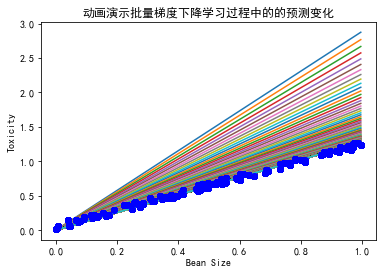

In [42]:
w = 3
alpha=0.1

fig = plt.figure()
ims = []

for _ in range(500):
    k = gradient(xs, ys, w)
    w = w -alpha*k
    y_pre = w*xs
    im = plt.plot(xs, y_pre) + plt.plot(xs, ys, 'o', color="blue")
    plt.title('动画演示批量梯度下降学习过程中的的预测变化')
    plt.xlabel('Bean Size')
    plt.ylabel('Toxicity')
    ims.append(im)
    



In [43]:
ani = animation.ArtistAnimation(fig, ims, interval=20, repeat_delay=1000)
ani.save("./output/03/批量梯度下降.gif", writer='pillow',dpi=200)


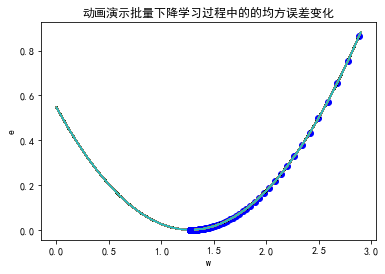

In [65]:

## 动画演示批量梯度下降学习过程中的的均方误差变化

w = 3
alpha = 0.1

fig = plt.figure()
ims = []
for _ in range(500):
    k = gradient(xs, ys, w)
    w = w -alpha*k

    im = plt.plot(ws, es) + plt.plot(w, MSE(xs, ys, w), 'o', color="blue")
    plt.title('动画演示批量下降学习过程中的的均方误差变化')
    plt.xlabel('w')
    plt.ylabel('e')
    ims.append(im)
fig.set_facecolor('white')
plt.title('动画演示批量下降学习过程中的的均方误差变化')
plt.xlabel('w')
plt.ylabel('e')
plt.savefig('./output/03/批量梯度下降_MSE.png', dpi=300)


In [56]:
ani = animation.ArtistAnimation(fig, ims, interval=20, repeat_delay=1000)
ani.save("./output/03/批量梯度下降_MSE.gif", writer='pillow', dpi=200)


## 固定步长下降

每次移动固定的步长，比如当斜率小于0时，往右，当斜率大于，往左；比如每次调整0.01

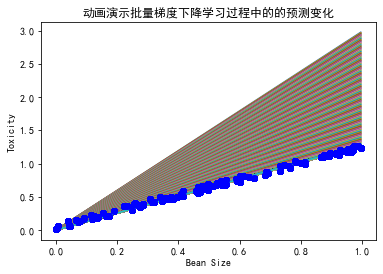

In [52]:
w = 3
step = 0.01


fig = plt.figure()
ims = []

for _ in range(500):
    k = gradient(xs, ys, w)
    w = w-step if k>0 else w+step
    y_pre = w*xs

    im = plt.plot(xs, y_pre) + plt.plot(xs, ys, 'o', color="blue")
    plt.title('动画演示批量梯度下降学习过程中的的预测变化')
    plt.xlabel('Bean Size')
    plt.ylabel('Toxicity')
    ims.append(im)




In [53]:
ani = animation.ArtistAnimation(fig, ims, interval=20, repeat_delay=1000)
ani.save("./output/03/固定步长.gif", writer='pillow', dpi=200)



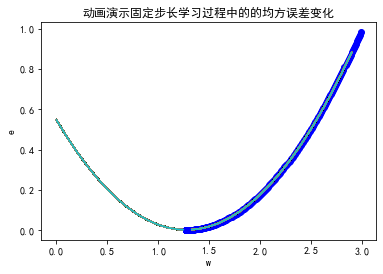

In [64]:

## 动画演示固定步长学习过程中的的均方误差变化

w = 3
fig = plt.figure()


ims = []
alpha = 0.1
step = 0.01
for _ in range(500):
    k = gradient(xs, ys, w)
    w = w-step if k > 0 else w+step
    y_pre = w*xs

    im = plt.plot(ws, es) + plt.plot(w, MSE(xs, ys, w), 'o', color="blue")
    plt.title('动画演示固定步长学习过程中的的均方误差变化')
    plt.xlabel('w')
    plt.ylabel('e')
    ims.append(im)
fig.set_facecolor('white')
plt.title('动画演示固定步长学习过程中的的均方误差变化')
plt.xlabel('w')
plt.ylabel('e')
plt.savefig('./output/03/固定步长_MSE.png',dpi=300)



<Figure size 432x288 with 0 Axes>

In [ ]:
ani = animation.ArtistAnimation(fig, ims, interval=20, repeat_delay=1000)
ani.save("./output/03/固定步长_MSE.gif", writer='pillow',dpi=200)